In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import norm, spearmanr,pearsonr,normaltest
from scipy.stats import shapiro

In [32]:
# Load MATLAB data
data = scipy.io.loadmat('../Data_example5.mat')
TMTa = data['TMTa'].flatten()
MMSE = data['MMSE'].flatten()

#In alternative to flatten():
# TMTa = np.reshape(TMTa, -1)
# MMSE = np.reshape(MMSE, -1)

In [24]:
TMTa

array([34.056, 49.991, 44.403, 46.069, 47.47 , 51.809, 56.798, 60.685,
       41.414, 74.62 , 48.407, 20.39 , 23.826, 33.207, 28.882, 23.51 ,
       59.951, 30.7  , 43.649, 31.902, 66.659, 26.412])

In [1]:
data['Patients']

NameError: name 'data' is not defined

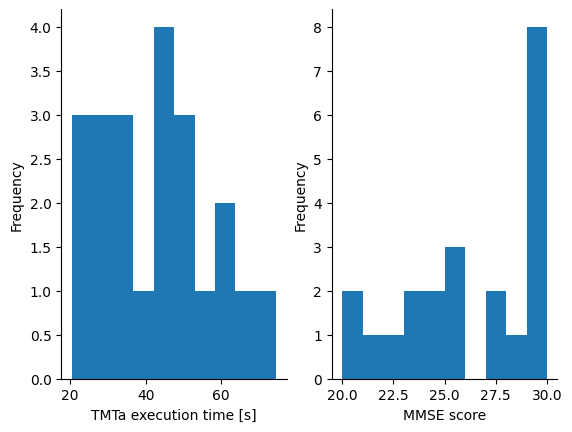

In [26]:
# Visualizzazione preliminare dei dati

fig, axs = plt.subplots(1, 2)
# Plot histograms
axs[0].hist(TMTa)
axs[0].set_xlabel('TMTa execution time [s]')
axs[1].set_xlabel('MMSE score')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')
axs[1].hist(MMSE)
# Turn off the top and right spines for both subplots
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [27]:
# Test di normalità
_, p1 = normaltest(TMTa)
_, p2 = normaltest(MMSE)
print(p1, p2)

0.611835375457461 0.09415505391370994


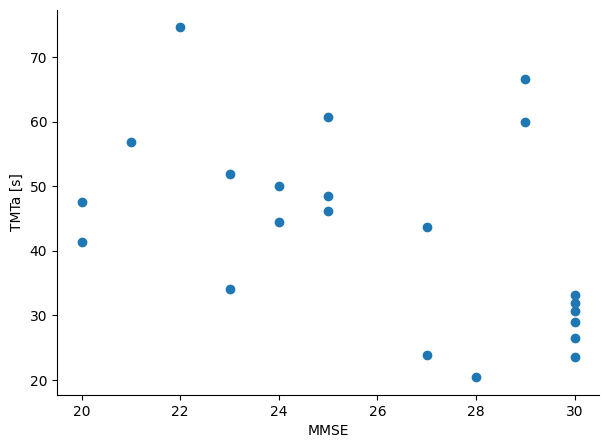

In [29]:
# Rappresentazione dei dati: scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(MMSE, TMTa)
ax.set_xlabel('MMSE')
ax.set_ylabel('TMTa [s]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [ ]:
# Correlazione
rho, pval = pearsonr(MMSE, TMTa)
# The p-value tests the null hypothesis that there is no correlation between the two variables.

In [37]:
rho

np.float64(-0.47712315542168654)

In [35]:
pval

np.float64(0.024746636779984163)

In [51]:
# Trovare i coefficienti della retta di regressione tra MMSE e TMTa
N = 1  # retta
p = np.polyfit(MMSE, TMTa, N)
# Predire i valori di TMTa, tramite p
TMTa_stimato = np.polyval(p, MMSE)

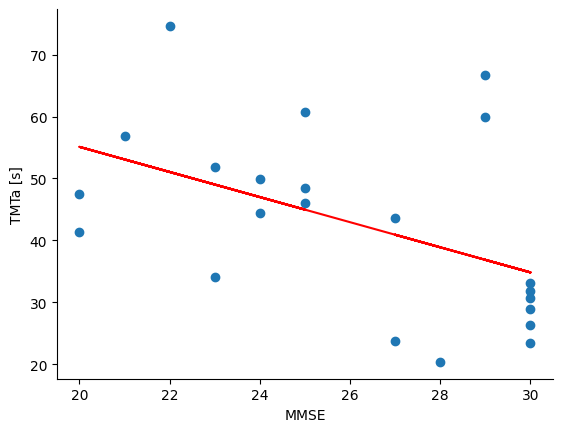

In [57]:
# Rappresentare la retta di regressione
fig, ax = plt.subplots()
ax.scatter(MMSE, TMTa)
ax.plot(MMSE, TMTa_stimato, 'r')
ax.set_xlabel('MMSE')
ax.set_ylabel('TMTa [s]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [60]:
# Calcolare il coefficiente di determinazione
#measure of how well the regression model explains the variance in the data
Rsq2 = np.sum((TMTa_stimato - np.mean(TMTa))**2) / np.sum((TMTa - np.mean(TMTa))**2)
Rsq2

np.float64(0.22764650543954676)